# 👨🏻‍💻 Tutorial: New `herbie` API

For inidividual files, you will mainly use the `Herbie` class imported from `herbie.archive`

In [1]:
from herbie.archive import Herbie

In [2]:
help(Herbie.__init__)

Help on function __init__ in module herbie.archive:

__init__(self, DATE, fxx=0, *, model='hrrr', field='sfc', priority=['aws', 'nomads', 'google', 'azure', 'pando', 'pando2'], save_dir=PosixPath('/p/cwfs/blaylock/data'), DATE_is_valid_time=False, overwrite=False, verbose=True)
    Specify model output and find GRIB2 file at one of the sources.
    
    Parameters
    ----------
    DATE : pandas-parsable datetime
        Model initialization datetime if 
        ``DATE_is_valid_time=False`` (default) or forecast valid 
        datetime if ``DATE_is_valid_time=True``.
    fxx : int
        Forecast lead time in hours. Available lead times depend on
        the model type and model version. Range from 0 to 15, 18, 
        36, or 48 (model and run dependant).
    model : {'hrrr', 'hrrrak', 'rap'}
        Model type. 
        - ``'hrrr'`` HRRR contiguous United States model
        - ``'hrrrak'`` HRRR Alaska model (alias ``'alaska'``)
        - ``'rap'`` RAP model
    field : {'sfc', 'pr

# Initialize a Herbie object.
What does this class do? When you specify a datetime, model type, and forecast lead time, Herbie will search the sources for the file you are requesting.
By default, it searches for the HRRR model surface fields (`sfc`) output files.

In [3]:
H = Herbie('2021-5-5')

🏋🏻‍♂️ Found 2021-May-05 00:00 UTC F00 HRRR sfc GRIB2 file from aws and index file from aws.                                                                                                     


This object tells us a file matching our request was found on Amazon Web Services. We can get the GRIB2 and index file URLs.

In [4]:
print(H.grib)
print(H.idx)

https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20210505/conus/hrrr.t00z.wrfsfcf00.grib2
https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20210505/conus/hrrr.t00z.wrfsfcf00.grib2.idx


Generally, you will only need to search for files using the default source priority order. But you can change the priority order if you wish.

In [5]:
# Specify the source priority to only look on Pando
H = Herbie('2021-5-5', priority='pando')

🏋🏻‍♂️ Found 2021-May-05 00:00 UTC F00 HRRR sfc GRIB2 file from pando and index file from pando.                                                                                                     


In [6]:
# Specify the source priority to only look on NOMADS
H = Herbie('2021-5-5', priority='nomads')

💔 Did not find a GRIB2 or Index File for 2021-May-05 00:00 UTC F00 HRRR                                                                                                     


It doesn't look like the file was found at nomads. We can tell Herbie to look at AWS after looking at NOMADS

In [7]:
# Specify the source priority.
H = Herbie('2021-5-5', priority=['nomads', 'aws'])

🏋🏻‍♂️ Found 2021-May-05 00:00 UTC F00 HRRR sfc GRIB2 file from aws and index file from aws.                                                                                                     


Ok, lets ask for the 15-hour forecast from our requested datetime

In [8]:
H = Herbie('2021-5-5', fxx=15)

🏋🏻‍♂️ Found 2021-May-05 00:00 UTC F15 HRRR sfc GRIB2 file from aws and index file from aws.                                                                                                     


We can also tell Herbie that the datetime we are requesting is the valid time. Herbie will adjust the model run time by the lead time requested.

In [9]:
H = Herbie('2021-5-5', fxx=15, DATE_is_valid_time=True)

🏋🏻‍♂️ Found 2021-May-04 09:00 UTC F15 HRRR sfc GRIB2 file from aws and index file from aws.                                                                                                     


# Download a Full File
If the file is found on one of the source locations, Herbie can download the full file to your local drive.

In [10]:
H = Herbie('2021-5-5', fxx=15, DATE_is_valid_time=True)
H.download()

🏋🏻‍♂️ Found 2021-May-04 09:00 UTC F15 HRRR sfc GRIB2 file from aws and index file from aws.                                                                                                     
👨🏻‍🏭 Created directory: [/p/cwfs/blaylock/data/hrrr/20210504]
✅ Success! Downloaded HRRR from aws                 
	src: https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20210504/conus/hrrr.t09z.wrfsfcf15.grib2
	dst: /p/cwfs/blaylock/data/hrrr/20210504/20210504_hrrr.t09z.wrfsfcf15.grib2


Now if you ask Herbie for the file, it will tell you that the file is stored locally. (Since the index files are never downloaded, we still search the source locations for the index file).

In [11]:
H = Herbie('2021-5-5', fxx=15, DATE_is_valid_time=True)

🏋🏻‍♂️ Found 2021-May-04 09:00 UTC F15 HRRR sfc GRIB2 file from local and index file from aws.                                                                                                     


# Download a Subset File
Often you don't need the full file, just a few variables. Because the index files tell us the byte range of each variable or GRIB message, we can download that portion of the file. Thus, files can be subsetted by variable. (Note that Herbie cannot subset the file by geographic area).

In this example, we will download all variables for the 1-h forecast for variables that are 2 m above ground.

In [12]:
# The full file already exists on Local Disk
H = Herbie('2021-5-5', fxx=1, DATE_is_valid_time=True)
H.download(':2 m')

🏋🏻‍♂️ Found 2021-May-04 23:00 UTC F01 HRRR sfc GRIB2 file from aws and index file from aws.                                                                                                     
📇 Download subset: HRRR model sfc fields run at 2021-May-04 23:00 UTC F01                                                            
 cURL from https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20210504/conus/hrrr.t23z.wrfsfcf01.grib2
   1: GRIB_message=58  LTPINX:2 m above ground:1 hour fcst
   2: GRIB_message=71  TMP:2 m above ground:1 hour fcst
   3: GRIB_message=72  POT:2 m above ground:1 hour fcst
   4: GRIB_message=73  SPFH:2 m above ground:1 hour fcst
   5: GRIB_message=74  DPT:2 m above ground:1 hour fcst
   6: GRIB_message=75  RH:2 m above ground:1 hour fcst


If we ask to download this file again, Herbie tells us we already have a local copy. But we can overwrite if you need to.

In [13]:
# The Subset File Already Exists
H = Herbie('2021-5-5', fxx=1, DATE_is_valid_time=True)
H.download(':2 m')

🏋🏻‍♂️ Found 2021-May-04 23:00 UTC F01 HRRR sfc GRIB2 file from aws and index file from aws.                                                                                                     
🌉 Already have local copy --> /p/cwfs/blaylock/data/hrrr/20210504/20210504_hrrr.t23z.wrfsfcf01.grib2.subset_58-71-72-73-74-75


In [14]:
# Now download the full file
H = Herbie('2021-5-5', fxx=1, DATE_is_valid_time=True, overwrite=True)
H.download()

🏋🏻‍♂️ Found 2021-May-04 23:00 UTC F01 HRRR sfc GRIB2 file from aws and index file from aws.                                                                                                     
✅ Success! Downloaded HRRR from aws                 
	src: https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20210504/conus/hrrr.t23z.wrfsfcf01.grib2
	dst: /p/cwfs/blaylock/data/hrrr/20210504/20210504_hrrr.t23z.wrfsfcf01.grib2


# Subset Search String
The magic trick for subsetting the data for what you want comes down to the search string. Herbie uses regular expression to search for lines in the index file to match which grib messages to download. Some examples are as follows.

``searchString`` |  Messages that will be downloaded
------ | ------
':TMP:2 m'                   | Temperature at 2 m.
':TMP:'                      | Temperature fields at all levels.
':UGRD:.* mb'                | U Wind at all pressure levels.
':500 mb:'                   | All variables on the 500 mb level.
':APCP:'                     | All accumulated precipitation fiel
':APCP:surface:0-[1-9]*'     | Accumulated precip since initializ
':APCP:surface:[1-9]*-[1-9]*'| Accumulated precip over last hour
':UGRD:10 m'                 | U wind component at 10 meters.
':(U|V)GRD:(10|80) m'        | U and V wind component at 10 and 8
':(U|V)GRD:'                 | U and V wind component at all leve
':.GRD:'                     | (Same as above)
':(TMP|DPT):'                | Temperature and Dew Point for all 
':(TMP|DPT|RH):'             | TMP, DPT, and Relative Humidity fo
':REFC:'                     | Composite Reflectivity
':surface:'                  | All variables at the surface.


If you need help with regular expression, search the web
or look at this [cheatsheet](https://www.petefreitag.com/cheatsheets/regex/).

Herbie can show you what the index file looks like as a Pandas DataFrame. The regular expression searches the last three columns. Mark a column in your search as `:`.

In [15]:
H.read_idx()

,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time
grib_message,,,,,,,,
1.0,0,413638,0-413638,2021-05-04 23:00:00,2021-05-05,REFC,entire atmosphere,1 hour fcst
2.0,413638,620931,413638-620931,2021-05-04 23:00:00,2021-05-05,RETOP,cloud top,1 hour fcst
3.0,620931,1052888,620931-1052888,2021-05-04 23:00:00,2021-05-05,var discipline=0 center=7 local_table=1 parmca...,entire atmosphere,1 hour fcst
4.0,1052888,1350199,1052888-1350199,2021-05-04 23:00:00,2021-05-05,VIL,entire atmosphere,1 hour fcst
5.0,1350199,2641359,1350199-2641359,2021-05-04 23:00:00,2021-05-05,VIS,surface,1 hour fcst
...,...,...,...,...,...,...,...,...
166.0,144147701,144148206,144147701-144148206,2021-05-04 23:00:00,2021-05-05,ICEC,surface,1 hour fcst
167.0,144148206,145694820,144148206-145694820,2021-05-04 23:00:00,2021-05-05,SBT123,top of atmosphere,1 hour fcst
168.0,145694820,147306051,145694820-147306051,2021-05-04 23:00:00,2021-05-05,SBT124,top of atmosphere,1 hour fcst


In [16]:
# See what messages will be downloaded by a search string.
H.read_idx('(U|V)GRD')

/p/home/blaylock/anaconda3/envs/basic38/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time
grib_message,,,,,,,,
10.0,4431068,5240057,4431068-5240057,2021-05-04 23:00:00,2021-05-05,UGRD,250 mb,1 hour fcst
11.0,5240057,6016250,5240057-6016250,2021-05-04 23:00:00,2021-05-05,VGRD,250 mb,1 hour fcst
12.0,6016250,6803127,6016250-6803127,2021-05-04 23:00:00,2021-05-05,UGRD,300 mb,1 hour fcst
13.0,6803127,7561546,6803127-7561546,2021-05-04 23:00:00,2021-05-05,VGRD,300 mb,1 hour fcst
17.0,9844141,10442998,9844141-10442998,2021-05-04 23:00:00,2021-05-05,UGRD,500 mb,1 hour fcst
18.0,10442998,11039264,10442998-11039264,2021-05-04 23:00:00,2021-05-05,VGRD,500 mb,1 hour fcst
23.0,14350298,14959819,14350298-14959819,2021-05-04 23:00:00,2021-05-05,UGRD,700 mb,1 hour fcst
24.0,14959819,15567617,14959819-15567617,2021-05-04 23:00:00,2021-05-05,VGRD,700 mb,1 hour fcst
28.0,18034120,18666124,18034120-18666124,2021-05-04 23:00:00,2021-05-05,UGRD,850 mb,1 hour fcst


In [17]:
# See what messages will be downloaded by a search string.
H.read_idx('(U|V)GRD:[8|5][0|5]0 mb')

/p/home/blaylock/anaconda3/envs/basic38/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time
grib_message,,,,,,,,
17.0,9844141,10442998,9844141-10442998,2021-05-04 23:00:00,2021-05-05,UGRD,500 mb,1 hour fcst
18.0,10442998,11039264,10442998-11039264,2021-05-04 23:00:00,2021-05-05,VGRD,500 mb,1 hour fcst
28.0,18034120,18666124,18034120-18666124,2021-05-04 23:00:00,2021-05-05,UGRD,850 mb,1 hour fcst
29.0,18666124,19282850,18666124-19282850,2021-05-04 23:00:00,2021-05-05,VGRD,850 mb,1 hour fcst


Here's another example: download all variables at 500 mb

In [18]:
# Download a different Subset of File the local file
H = Herbie('2021-5-5', fxx=0, DATE_is_valid_time=True)
H.download(':500 mb:')

🏋🏻‍♂️ Found 2021-May-05 00:00 UTC F00 HRRR sfc GRIB2 file from aws and index file from aws.                                                                                                     
👨🏻‍🏭 Created directory: [/p/cwfs/blaylock/data/hrrr/20210505]
📇 Download subset: HRRR model sfc fields run at 2021-May-05 00:00 UTC F00                                                            
 cURL from https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20210505/conus/hrrr.t00z.wrfsfcf00.grib2
   1: GRIB_message=14  HGT:500 mb:anl
   2: GRIB_message=15  TMP:500 mb:anl
   3: GRIB_message=16  DPT:500 mb:anl
   4: GRIB_message=17  UGRD:500 mb:anl
   5: GRIB_message=18  VGRD:500 mb:anl


In [19]:
# Show path to subset file. You should check if this path exists or not.
H.get_localPath(':500 mb')

PosixPath('/p/cwfs/blaylock/data/hrrr/20210505/20210505_hrrr.t00z.wrfsfcf00.grib2.subset_14-15-16-17-18')

# Read GRIB2 file with xarray
Herbie can read files with xarray via cfgrib. By default, if the file requested does not already exist on local disk, Herbie will delete the file after it is loaded into memory. 

In [20]:
# Read file with xarray that does not exists on disk
H = Herbie('2021-5-6', fxx=0, DATE_is_valid_time=True)
Hx = H.xarray(':500 mb')
Hx

🏋🏻‍♂️ Found 2021-May-06 00:00 UTC F00 HRRR sfc GRIB2 file from aws and index file from aws.                                                                                                     
👨🏻‍🏭 Created directory: [/p/cwfs/blaylock/data/hrrr/20210506]
📇 Download subset: HRRR model sfc fields run at 2021-May-06 00:00 UTC F00                                                            
 cURL from https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20210506/conus/hrrr.t00z.wrfsfcf00.grib2
   1: GRIB_message=14  HGT:500 mb:anl
   2: GRIB_message=15  TMP:500 mb:anl
   3: GRIB_message=16  DPT:500 mb:anl
   4: GRIB_message=17  UGRD:500 mb:anl
   5: GRIB_message=18  VGRD:500 mb:anl


<xarray.Dataset>
Dimensions:        (x: 1799, y: 1059)
Coordinates:
    time           datetime64[ns] 2021-05-06
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  float64 500.0
    latitude       (y, x) float64 21.14 21.15 21.15 21.16 ... 47.86 47.85 47.84
    longitude      (y, x) float64 237.3 237.3 237.3 237.4 ... 299.0 299.0 299.1
    valid_time     datetime64[ns] 2021-05-06
Dimensions without coordinates: x, y
Data variables:
    t              (y, x) float32 265.0 265.0 265.0 265.0 ... 257.8 257.8 257.8
    u              (y, x) float32 7.771 7.771 7.708 7.708 ... 11.96 12.02 12.08
    v              (y, x) float32 -0.4765 -0.414 -0.3515 ... 4.274 4.274 4.274
    gh             (y, x) float32 5.813e+03 5.813e+03 ... 5.601e+03 5.601e+03
    dpt            (y, x) float32 222.9 223.1 223.2 223.3 ... 255.3 255.3 255.3
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    model:                   hrrr
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              /p/cwfs/blaylock/data/hrrr/20210506/20210506_hrr...

In [21]:
# The local grib does not exists because it was removed
Hx.attrs['local_grib'].exists()

False

In [22]:
# You can tell xarray not to delete the grib2 file
H = Herbie('2021-5-6', fxx=0, DATE_is_valid_time=True)
Hx = H.xarray(':500 mb', remove_grib=False)
Hx

🏋🏻‍♂️ Found 2021-May-06 00:00 UTC F00 HRRR sfc GRIB2 file from aws and index file from aws.                                                                                                     
📇 Download subset: HRRR model sfc fields run at 2021-May-06 00:00 UTC F00                                                            
 cURL from https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20210506/conus/hrrr.t00z.wrfsfcf00.grib2
   1: GRIB_message=14  HGT:500 mb:anl
   2: GRIB_message=15  TMP:500 mb:anl
   3: GRIB_message=16  DPT:500 mb:anl
   4: GRIB_message=17  UGRD:500 mb:anl
   5: GRIB_message=18  VGRD:500 mb:anl


<xarray.Dataset>
Dimensions:        (x: 1799, y: 1059)
Coordinates:
    time           datetime64[ns] 2021-05-06
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  float64 500.0
    latitude       (y, x) float64 21.14 21.15 21.15 21.16 ... 47.86 47.85 47.84
    longitude      (y, x) float64 237.3 237.3 237.3 237.4 ... 299.0 299.0 299.1
    valid_time     datetime64[ns] 2021-05-06
Dimensions without coordinates: x, y
Data variables:
    t              (y, x) float32 ...
    u              (y, x) float32 ...
    v              (y, x) float32 ...
    gh             (y, x) float32 ...
    dpt            (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    model:                   hrrr
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              /p/cwfs/blaylock/data/hrrr/20210506/20210506_hrr...

In [23]:
# The local grib does exists
Hx.attrs['local_grib'].exists()

True

# Plot with `herbie` xarray custom accessor
This requires my [Carpenter Workshop](https://github.com/blaylockbk/Carpenter_Workshop) functions.

cfgrib variable: t
GRIB_cfName air_temperature
GRIB_cfVarName t
GRIB_name Temperature
GRIB_units K
GRIB_typeOfLevel isobaricInhPa



/p/home/blaylock/anaconda3/envs/basic38/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


cfgrib variable: u
GRIB_cfName eastward_wind
GRIB_cfVarName u
GRIB_name U component of wind
GRIB_units m s**-1
GRIB_typeOfLevel isobaricInhPa

cfgrib variable: v
GRIB_cfName northward_wind
GRIB_cfVarName v
GRIB_name V component of wind
GRIB_units m s**-1
GRIB_typeOfLevel isobaricInhPa

cfgrib variable: gh
GRIB_cfName geopotential_height
GRIB_cfVarName gh
GRIB_name Geopotential Height
GRIB_units gpm
GRIB_typeOfLevel isobaricInhPa

cfgrib variable: dpt
GRIB_cfName unknown
GRIB_cfVarName dpt
GRIB_name Dew point temperature
GRIB_units K
GRIB_typeOfLevel isobaricInhPa



<GeoAxesSubplot:title={'left':'Run: 00:00 UTC 06 May 2021 F00','center':'HRRR 500 hPa','right':'Valid: 00:00 UTC 06 May 2021'}>

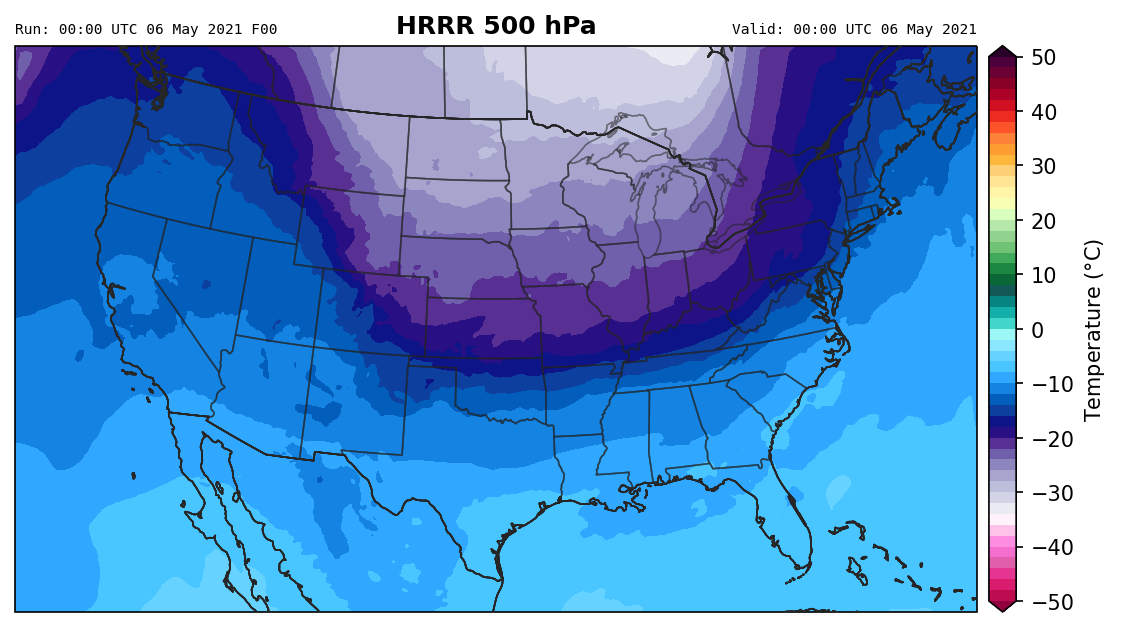

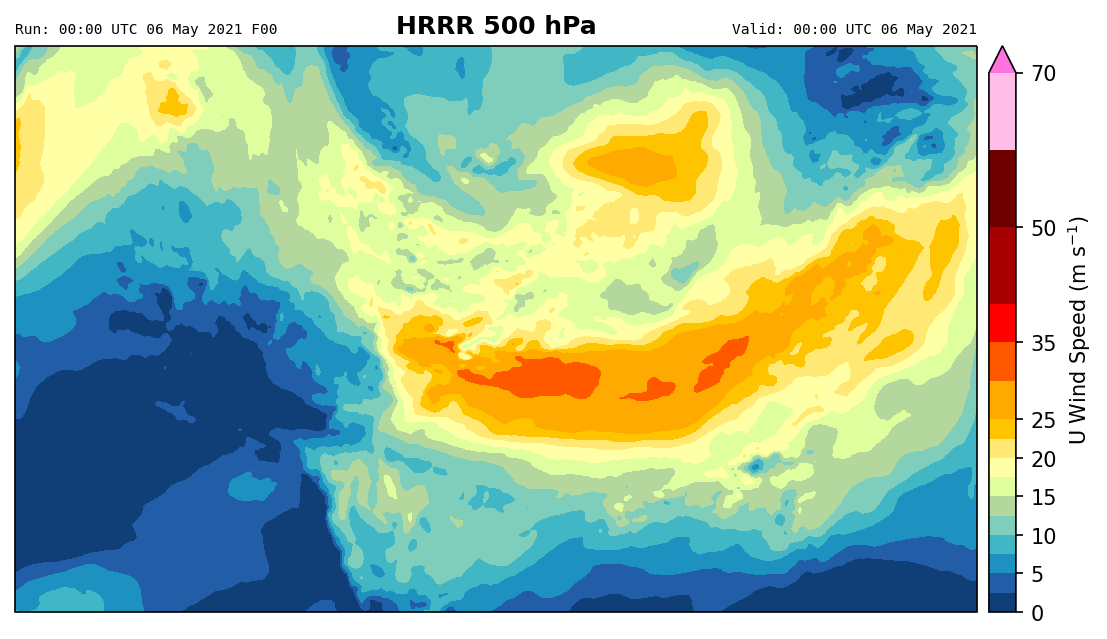

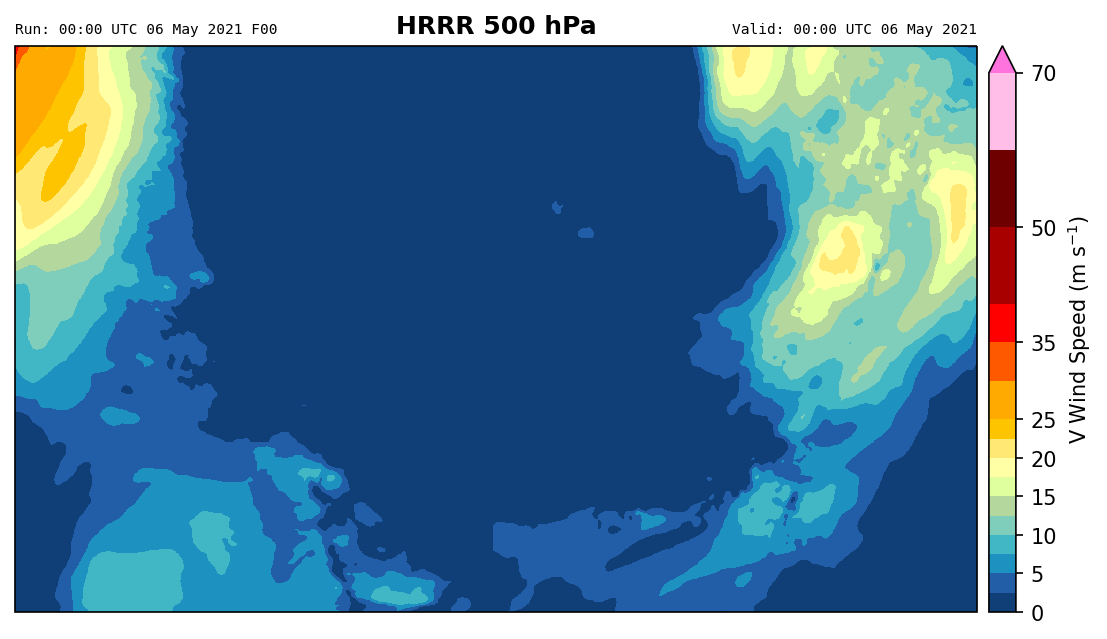

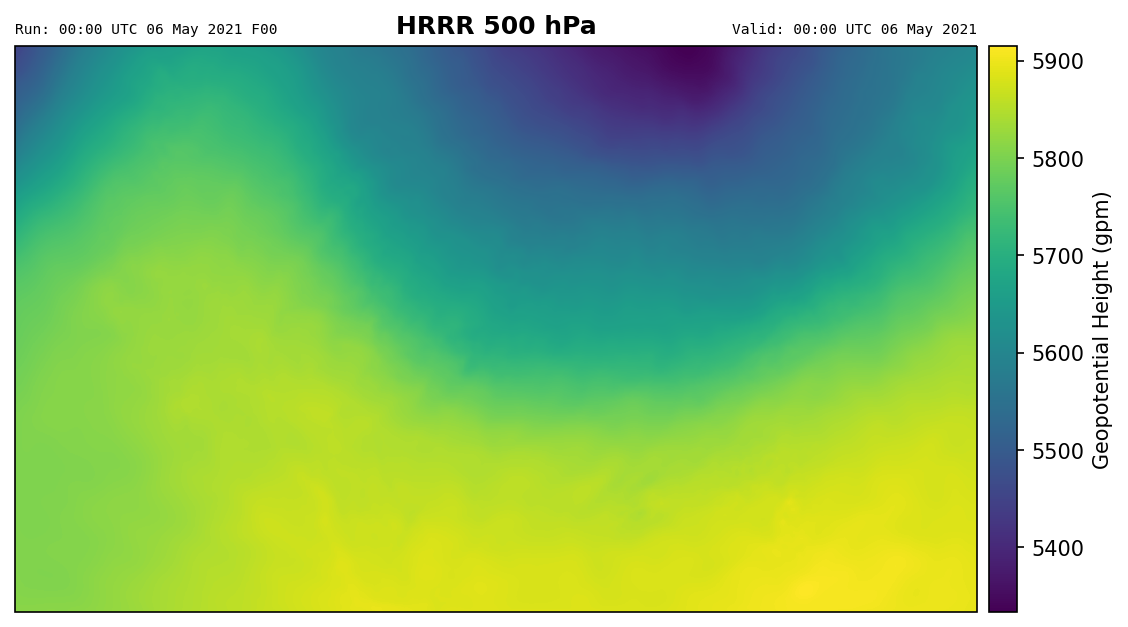

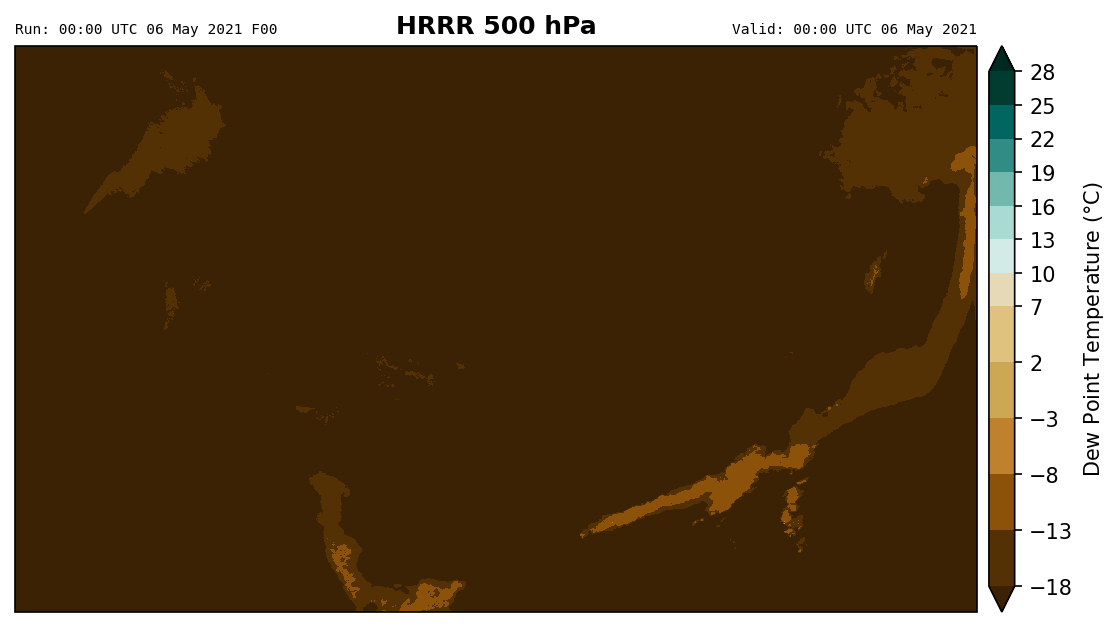

In [24]:
Hx.herbie.plot()

# Index File DataFrame if it exists

In [25]:
# Last used dataframe (for subsetting)
H.idx_df

,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time
grib_message,,,,,,,,
14.0,7115923,7852741,7115923-7852741,2021-05-06,2021-05-06,HGT,500 mb,anl
15.0,7852741,8404348,7852741-8404348,2021-05-06,2021-05-06,TMP,500 mb,anl
16.0,8404348,9419745,8404348-9419745,2021-05-06,2021-05-06,DPT,500 mb,anl
17.0,9419745,10005437,9419745-10005437,2021-05-06,2021-05-06,UGRD,500 mb,anl
18.0,10005437,10598997,10005437-10598997,2021-05-06,2021-05-06,VGRD,500 mb,anl


In [26]:
# Full DataFrame
H.read_idx()

,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time
grib_message,,,,,,,,
1.0,0,326152,0-326152,2021-05-06,2021-05-06,REFC,entire atmosphere,anl
2.0,326152,541049,326152-541049,2021-05-06,2021-05-06,RETOP,cloud top,anl
3.0,541049,949358,541049-949358,2021-05-06,2021-05-06,var discipline=0 center=7 local_table=1 parmca...,entire atmosphere,anl
4.0,949358,1250795,949358-1250795,2021-05-06,2021-05-06,VIL,entire atmosphere,anl
5.0,1250795,2540083,1250795-2540083,2021-05-06,2021-05-06,VIS,surface,anl
...,...,...,...,...,...,...,...,...
166.0,134633268,134633761,134633268-134633761,2021-05-06,2021-05-06,ICEC,surface,anl
167.0,134633761,136199793,134633761-136199793,2021-05-06,2021-05-06,SBT123,top of atmosphere,anl
168.0,136199793,137885418,136199793-137885418,2021-05-06,2021-05-06,SBT124,top of atmosphere,anl


# Herbie Logo

In [27]:
import matplotlib.pyplot as plt
from herbie.misc import HerbieLogo

<AxesSubplot:>

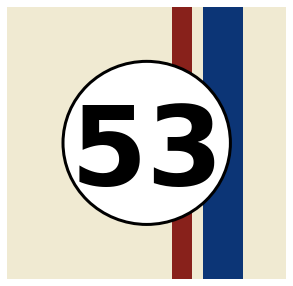

In [28]:
HerbieLogo()

# Bulk Download
You may use the `bulk_download` tool to download many model output files by date and forecast lead time.

In [29]:
from herbie.tools import bulk_download
import pandas as pd

In [30]:
help(bulk_download)

Help on function bulk_download in module herbie.tools:

bulk_download(DATES, searchString=None, *, fxx=range(0, 1), model='hrrr', field='sfc', priority=None, verbose=True)
    Bulk download GRIB2 files from file source to the local machine.
    
    Iterates over a list of datetimes (DATES) and forecast lead times (fxx).
    
    Parameters
    ----------
    DATES : list
        List of datetimes
    searchString : None or str
        If None, download the full file. If string, use regex to search
        index files for variables and levels of interest and only
        download the matched GRIB messages.
    fxx : int or list
        List of forecast lead times to download. Default only downloads model analysis.
    model : {'hrrr', 'hrrrak', 'rap'}
        Model to download.
    field : {'sfc', 'prs', 'nat', 'subh'}
        Variable fields file to download. Not needed for RAP model.



In [31]:
# Use pandas to create a list of Datetimes
DATES = pd.date_range('2020-1-1', '2020-1-2', freq='3H')
DATES

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 03:00:00',
               '2020-01-01 06:00:00', '2020-01-01 09:00:00',
               '2020-01-01 12:00:00', '2020-01-01 15:00:00',
               '2020-01-01 18:00:00', '2020-01-01 21:00:00',
               '2020-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='3H')

In [ ]:
H_list = bulk_download(DATES, fxx=[0])

👨🏻‍🔬 Check which requested files exists
🏋🏻‍♂️ Found 2020-Jan-01 00:00 UTC F00 HRRR sfc GRIB2 file from aws and index file from aws.                                                                                                     
🏋🏻‍♂️ Found 2020-Jan-01 03:00 UTC F00 HRRR sfc GRIB2 file from aws and index file from aws.                                                                                                     
🏋🏻‍♂️ Found 2020-Jan-01 06:00 UTC F00 HRRR sfc GRIB2 file from aws and index file from aws.                                                                                                     
🏋🏻‍♂️ Found 2020-Jan-01 09:00 UTC F00 HRRR sfc GRIB2 file from aws and index file from aws.                                                                                                     
🏋🏻‍♂️ Found 2020-Jan-01 12:00 UTC F00 HRRR sfc GRIB2 file from aws and index file from aws.                                                                                                 

What happens if you try to load them again?

In [ ]:
H_list = bulk_download(DATES)

# Concatenante xarray DataSets

In [ ]:
from herbie.tools import xr_concat_sameRun, xr_concat_sameLead
import pandas as pd

In [ ]:
Hxcat = xr_concat_sameRun('2018-5-1', 'TMP:2 m', fxx=range(3))
Hxcat

In [ ]:
# Get concatenated Dataset for 10-m wind for the 6-h forecast for three consecutive hours
DATES = pd.date_range('2019-7-4', periods=3, freq='1H')
Hxcat2 = xr_concat_sameLead(DATES, '(U|V)GRD:10 m', fxx=6)
Hxcat2